Lab based on: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

# Step 1 : Reading and understanding Train and Test Data set¶


In [1]:
!pip install seaborn

In [1]:
#Loading Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

train_original = pd.read_csv("input/train_ctrUa4K.csv")
train = train_original
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
#Reading the name of columns in data set 
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
test = pd.read_csv("input/test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
#Reading the name of columns in data set 
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# What are the data types present in the data?

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB



# Univariate Analysis
It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable

## visualize features of the data set by graph and get the analysis

## Study categorical features such as Gender, Married, Self_Employed and Credit_History

## visualize the numerical variables: distribution of Applicant income first.

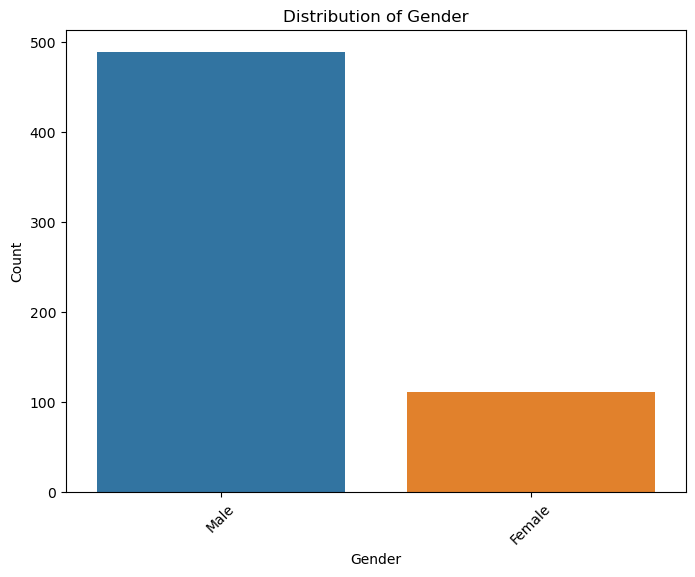

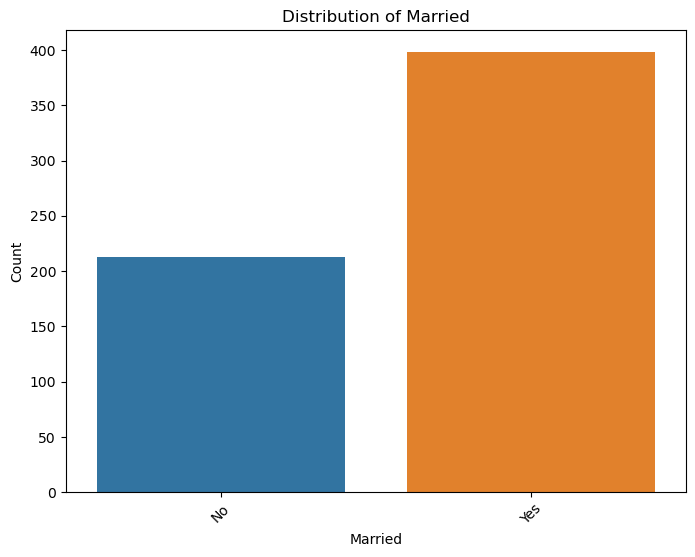

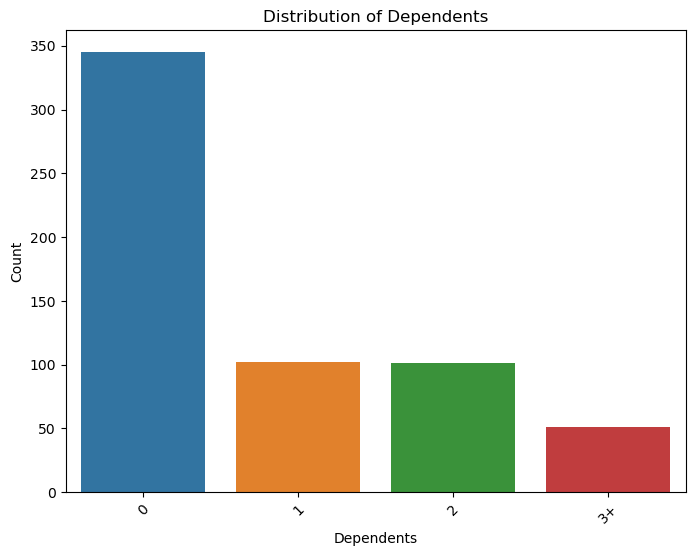

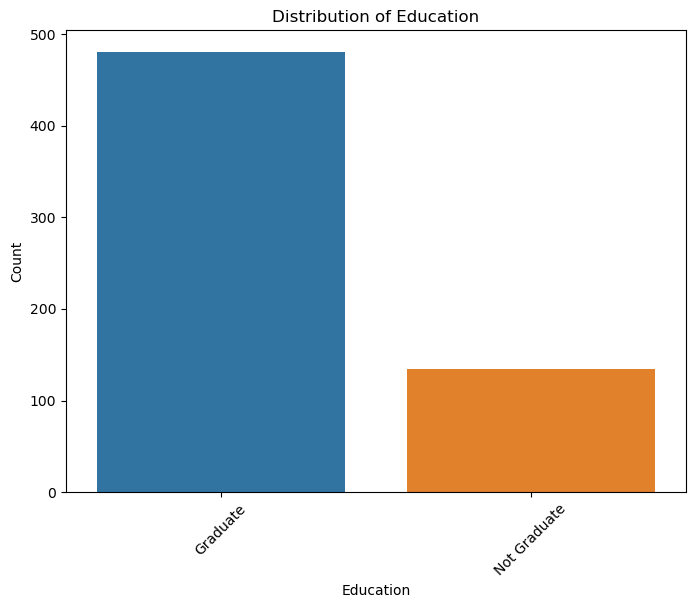

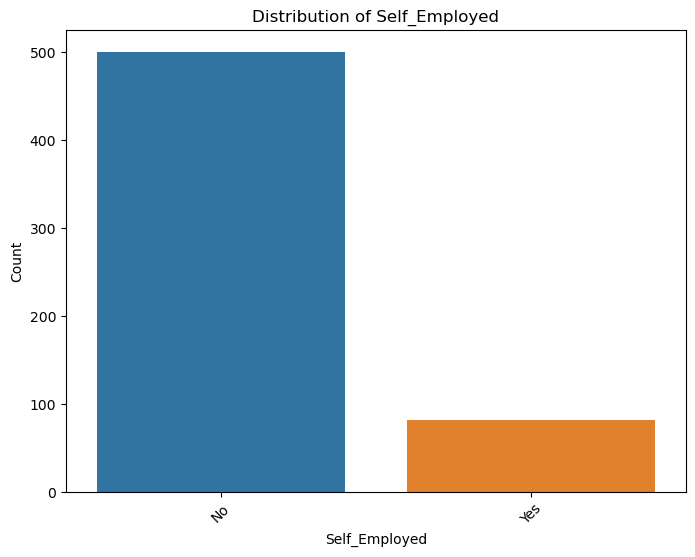

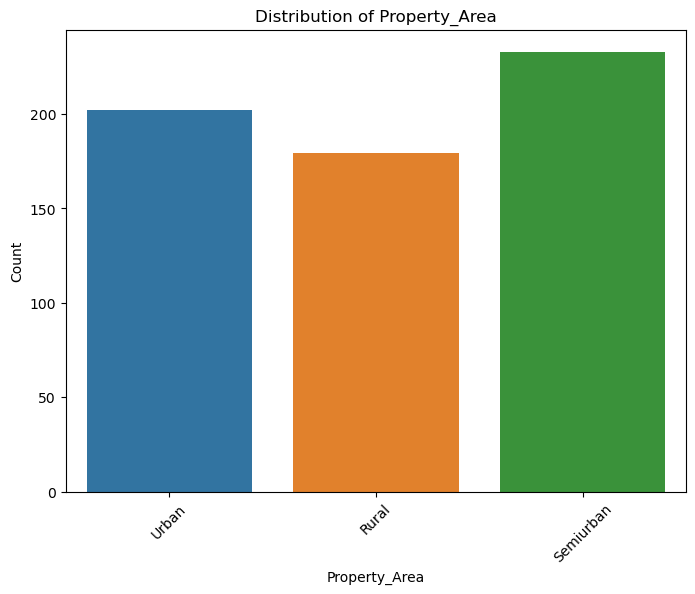

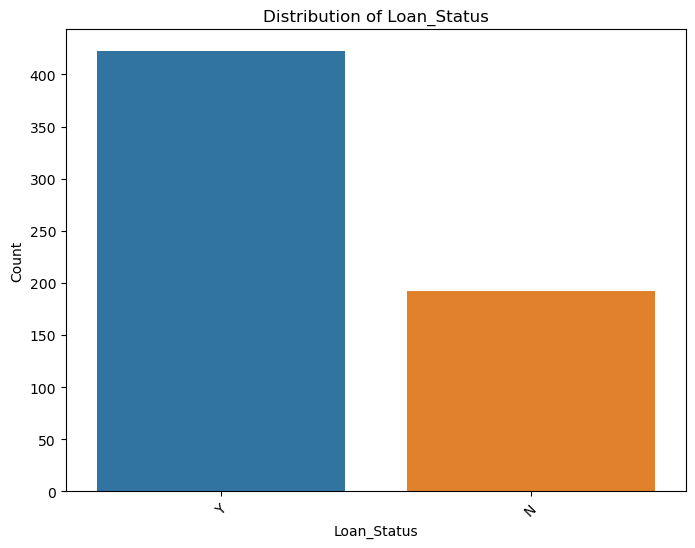

In [6]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

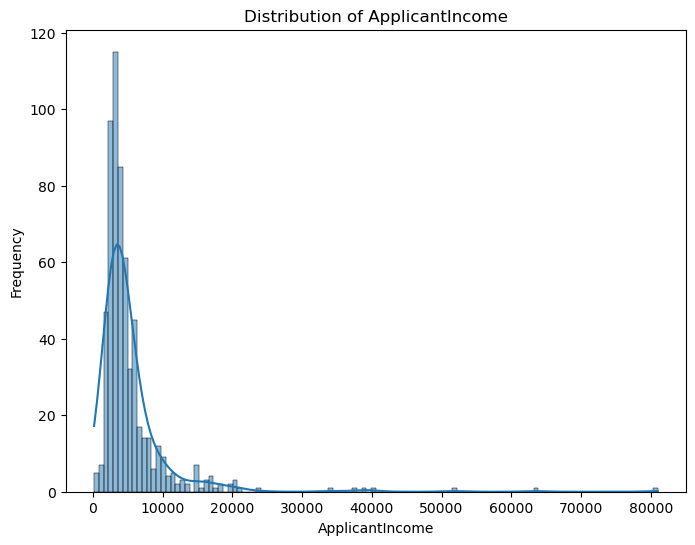

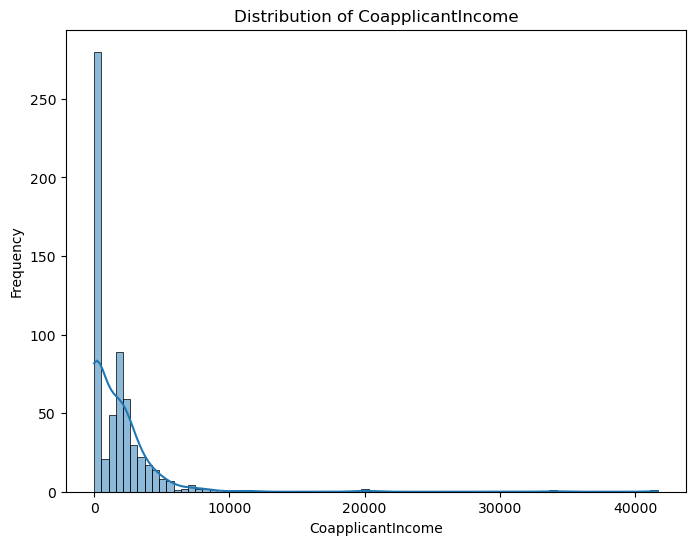

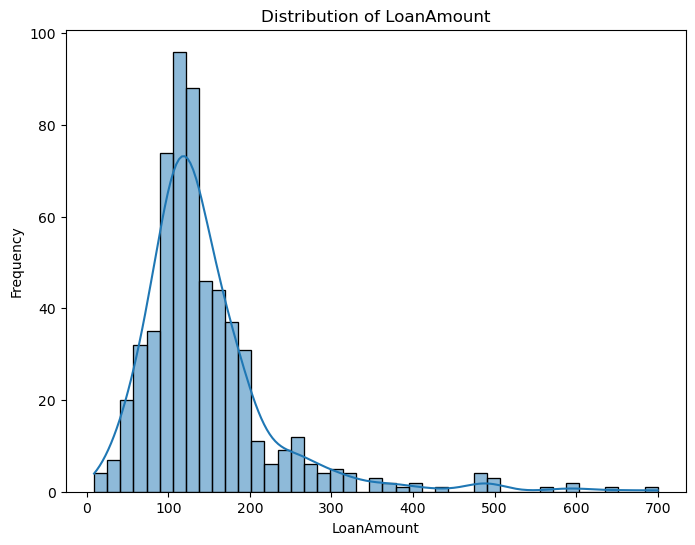

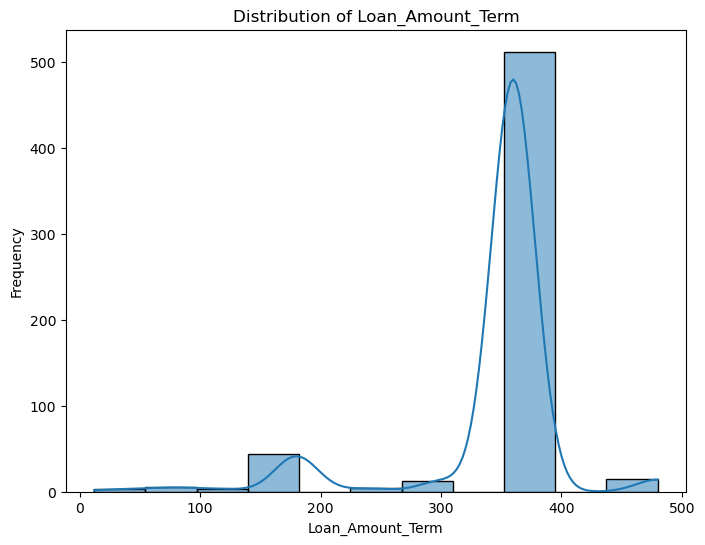

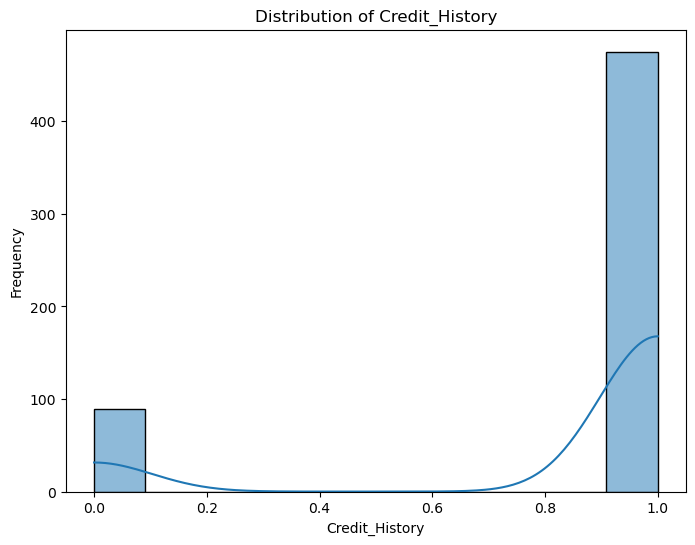

In [7]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Bivariate Analysis
Analyse the independent variable with respect to target variable. 

## Use bar plots to vizualice Gender vs Loan_Status, Education vs Loan_Status, Property_Area vs Loan_Status

## identify the most correlated variables to Loan_Status

## Identify, count and treat outliers and missing values

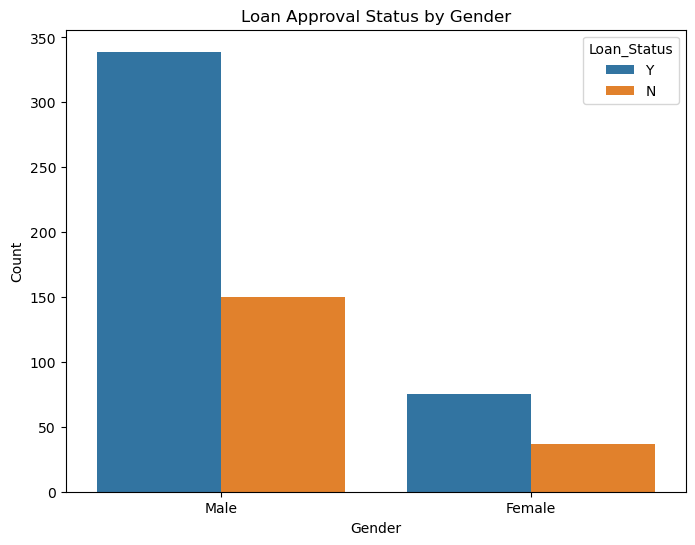

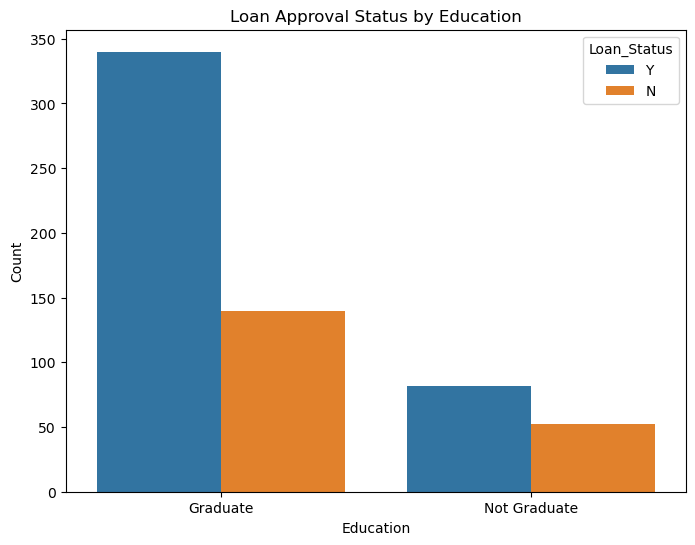

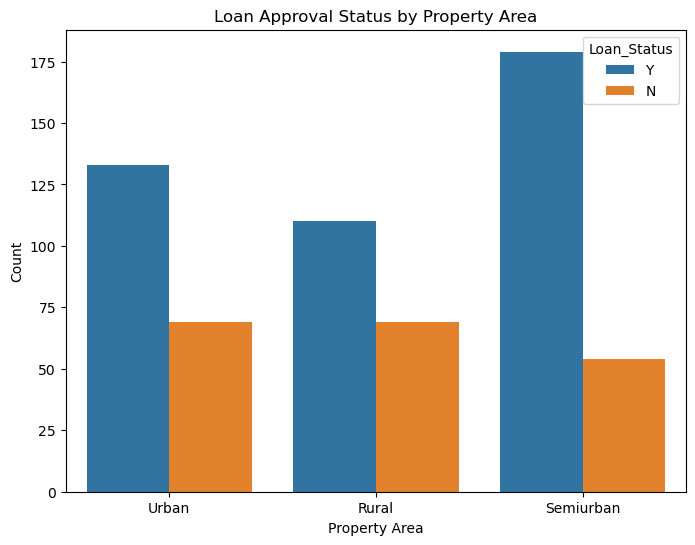

In [8]:
# Bivariate Analysis: Independent variable vs Target variable

# Gender vs Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Gender', hue='Loan_Status')
plt.title('Loan Approval Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan_Status')
plt.show()

# Education vs Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Education', hue='Loan_Status')
plt.title('Loan Approval Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan_Status')
plt.show()

# Property_Area vs Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Property_Area', hue='Loan_Status')
plt.title('Loan Approval Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan_Status')
plt.show()

In [9]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
categorical = []
numerical = []

for i,c in enumerate(train.dtypes):
    if c == object:
        categorical.append(train.iloc[:, i])
    else :
        numerical.append(train.iloc[:, i])
        

categorical = pd.DataFrame(categorical).transpose()
numerical = pd.DataFrame(numerical).transpose()

In [11]:
categorical = categorical.apply(lambda x:x.fillna(x.value_counts().index[0]))
categorical.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [12]:
numerical.fillna(method='bfill', inplace=True)
numerical.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

target_values = {'Y': 0 , 'N' : 1}

target = categorical['Loan_Status']
categorical.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

for i in categorical:
    categorical[i] = le.fit_transform(categorical[i])

In [14]:
train_cleaned = pd.concat([categorical, numerical, target], axis=1)

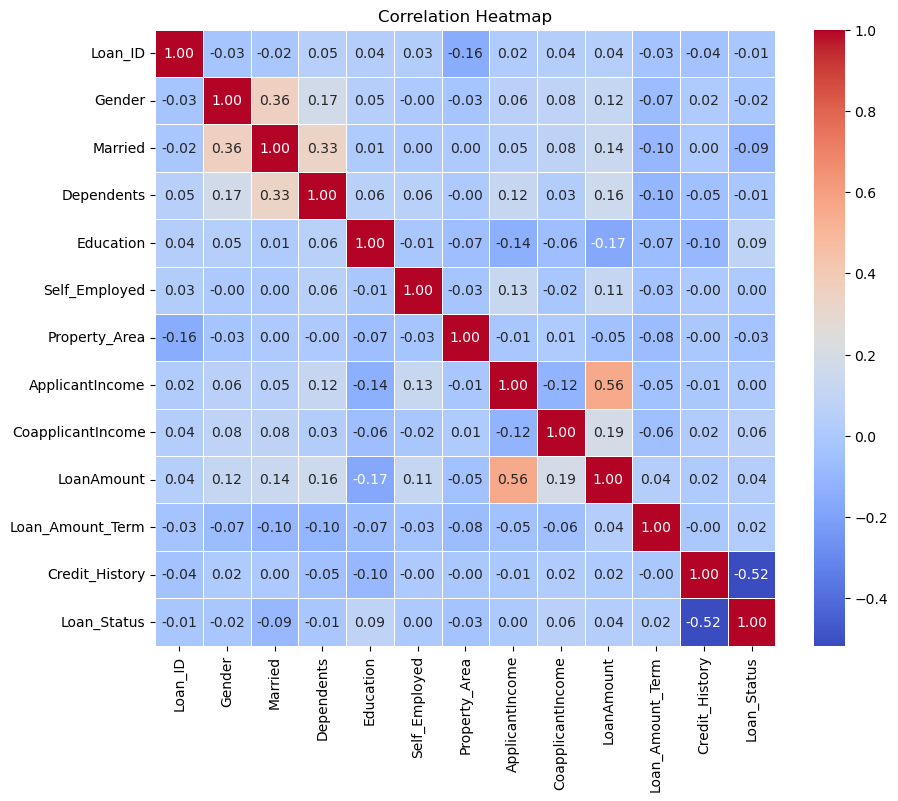

In [15]:
correlation_matrix = train_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Model Building 

## Using the train dataset you should be able to select the best model. 
## Use feature selection
## Cross validation
## Try different models such as:

1) Decision Tree Classifier
2) Random Forest Classifier
3) K-Nearest-Neighbors
4) Support Vector Classifier
5) XGBoost

In [16]:
X = pd.concat([categorical, numerical], axis=1)
Y = target 

In [36]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0


In [20]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 326.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 581.0 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 807.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 901.1 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.5 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.4 MB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 M

In [38]:
#feature selection

from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

clf = LogisticRegression(solver='lbfgs',max_iter=1000)

ffs= SequentialFeatureSelector(clf, k_features='best',forward=True)

ffs.fit(X,Y)


features = list(ffs.k_feature_names_)
#features = list(map(int, features))

features

['Credit_History']

[0.00241158 0.         0.02058058 0.         0.         0.01344145
 0.02234352 0.01381297 0.02482433 0.         0.         0.12379482]


<BarContainer object of 12 artists>

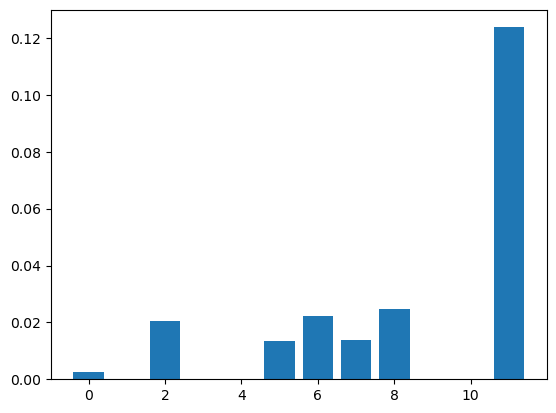

In [35]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
importances = mutual_info_classif(X,Y)
plt.bar(np.arange(12),importances)

<BarContainer object of 12 artists>

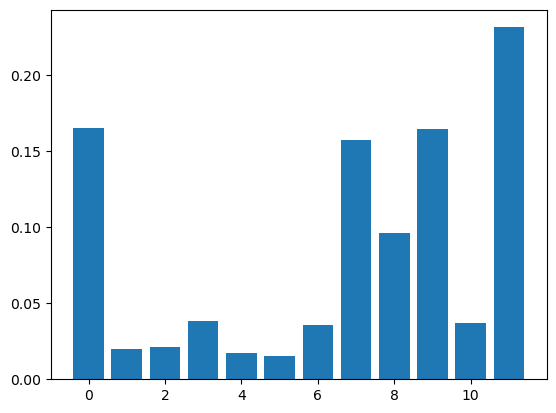

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X,Y)

importances = clf.feature_importances_
plt.bar(np.arange(12),importances)

The test dataset doesn't have target. You are provided with a sample submition file. It is necesary to generate such a file with the two best models you have and attach it to your report. 